In [1]:
# 資料權限
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)
#%cd /content/drive/My-Drive/

#匯入所需套件
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

# 在線GPU性能检验
!nvidia-smi 

Mounted at /content/gdrive/
Thu May 13 14:34:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                            

In [2]:
#匯入資料
raw = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/test8.csv')
raw['Date'] = pd.to_datetime(raw.Date, format = '%Y/%m/%d')

#read the data
stock = raw 
amount = len(stock) #總資料筆數
stock

,Date,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,2018-06-11,66.419998,62.356850,201.366592,139.268356,43.161572,35.760654,36.075409,29.904634,21.776939,91.941254
1,2018-06-12,68.554001,61.476101,204.039581,136.954926,42.667358,35.661705,39.682949,30.325052,21.423853,92.215569
2,2018-06-13,68.956001,62.444927,206.712601,138.805664,42.914463,35.008633,43.649250,29.952877,20.832191,91.884514
3,2018-06-14,71.543999,61.476101,201.812103,140.656418,42.667358,34.068604,48.014175,29.692720,20.994423,93.937096
4,2018-06-15,71.634003,61.476101,205.821594,142.969833,42.832092,33.504589,52.817585,29.118149,20.813103,93.643867
...,...,...,...,...,...,...,...,...,...,...,...
746,2021-04-26,738.200012,104.000000,610.000000,104.000000,54.200001,30.920000,349.000000,53.840000,27.290001,135.169998
747,2021-04-27,704.739990,106.000000,610.000000,103.500000,54.400002,31.129999,348.600006,54.119999,27.670000,135.149994
748,2021-04-28,694.400024,104.500000,602.000000,102.500000,54.799999,32.680000,367.029999,55.400002,27.709999,135.919998
749,2021-04-29,677.000000,106.000000,600.000000,103.500000,54.599998,31.950001,379.989990,56.290001,26.459999,138.179993


In [3]:
#設定資料之input variable (X) 與target variable (Y)。如以被預測日前ref_day天作為input variables，以被預測日做為target variable
def xy_set(dataset, ref_day):
    predict_day=1 #predict_day:被預測天數
    X = [[0 for i in range(ref_day)] for j in range(dataset.shape[0]-predict_day-ref_day)] #宣告輸入變數空集合
    Y = [0 for j in range(dataset.shape[0]-predict_day-ref_day)] #宣告被預測變數空集合
    for i in range(dataset.shape[0]-predict_day-ref_day):
        X[i] = dataset[i:i+ref_day,0] #前ref_day天資料
        Y[i] = dataset[i+ref_day:i+ref_day+predict_day,0] #第ref_day+1天資料
    return np.array(X),np.array(Y)

In [4]:
def show_train_history(train_history,train,validation):
   #train_history訓練過程；train訓練結果；validation驗證結果

      plt.plot(train_history.history[train]) #描繪訓練結果
      plt.plot(train_history.history[validation]) #描繪驗證結果
      plt.title('Train History') #圖標題
      plt.ylabel(train) #y軸標籤
      plt.xlabel('Epoch') #x軸標籤
      plt.legend(['train', 'validation'], loc='upper left') #設定訓練與驗證之圖例及位置
      plt.show()

In [5]:
## 預設參數
ref_day = 5 #ref_day:預測參照天數
d = 0.2
dim= stock.shape[1]#-1
%pylab inline
#讓圖形直接顯示於jupyter note

rdf= pd.DataFrame() #用于保存所有股票的预测价格

## 
from sklearn import preprocessing #使用sklearn的preprocessing的MinMaxScaler進行正規化:(x-min)/(max-min)

Populating the interactive namespace from numpy and matplotlib


In [6]:
def show_test_result(Real_data,Prediciton_data):
    plt.plot(Real_data, color="red", label="Real Stock Price") #描繪測試資料真實股價
    plt.plot(Prediciton_data, color="blue", label="Predicted Stock Price") #描繪測試資料預測股價
    plt.title('Stock Prediction')
    plt.ylabel('Price') 
    plt.xlabel('Time') 
    plt.legend()
    plt.show()

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.83412145]
 [0.93225328]
 [0.79055891]
 [0.86551426]
 [0.75149205]]
第Y個預測日之正規化股價
0.6439034631215403
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 256)            264192    
_________________________________________________________________
dropout (Dropout)            (None, 5, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_2 (Dropout)        

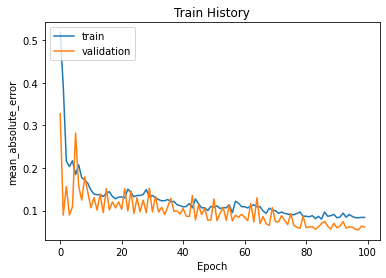

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.02136679]
 [0.02088998]
 [0.02233694]
 [0.02243608]
 [0.02019601]]
第Y個預測日之正規化股價
0.019225867199379132
18/18 [==============================] - 0s 9ms/step - loss: 0.0267 - mean_absolute_error: 0.0267


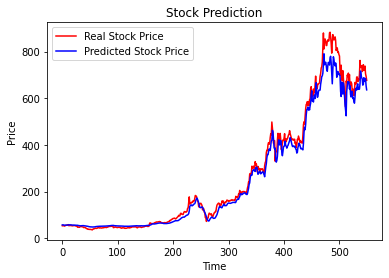

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.15118045]
 [0.15118045]
 [0.11579774]
 [0.08041502]
 [0.12866431]]
第Y個預測日之正規化股價
0.09006487479635172
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 256)            264192    
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 256)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
dropout_7 (Dropout)     

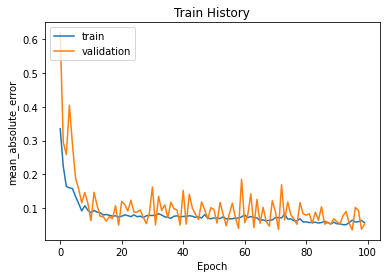

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.16209478]
 [0.19919107]
 [0.18483113]
 [0.18483113]
 [0.18483113]]
第Y個預測日之正規化股價
0.16927470517203946
18/18 [==============================] - 0s 10ms/step - loss: 0.0357 - mean_absolute_error: 0.0357


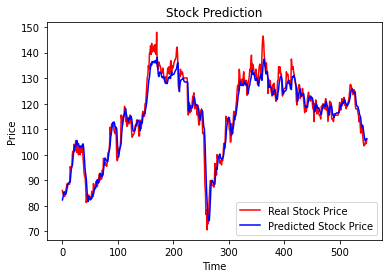

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.26099865]
 [0.26099865]
 [0.15943695]
 [0.17636424]
 [0.18482788]]
第Y個預測日之正規化股價
0.20175429950928914
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_10 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_11 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_12 (Dropout)    

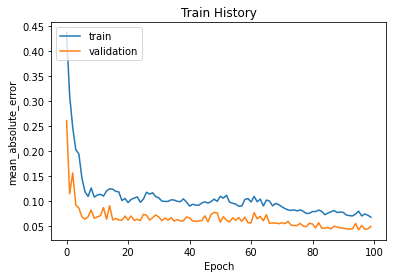

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.02317164]
 [0.02216412]
 [0.02518653]
 [0.0322388 ]
 [0.03828362]]
第Y個預測日之正規化股價
0.024179049797491636
18/18 [==============================] - 0s 10ms/step - loss: 0.0403 - mean_absolute_error: 0.0403


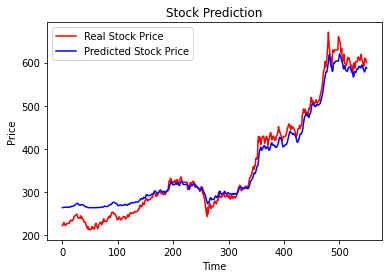

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[1.        ]
 [1.        ]
 [0.87109687]
 [0.84245226]
 [0.84245226]]
第Y個預測日之正規化股價
0.7994839208225155
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_16 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_17 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_17 (Dropout)     

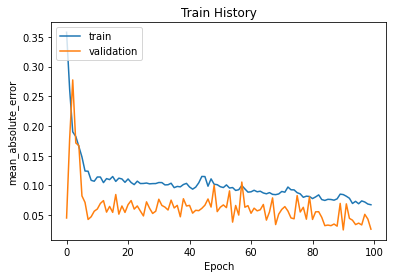

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.73868396]
 [0.73868396]
 [0.74680415]
 [0.73056378]
 [0.74680415]]
第Y個預測日之正規化股價
0.698083172733587
18/18 [==============================] - 0s 9ms/step - loss: 0.0593 - mean_absolute_error: 0.0593


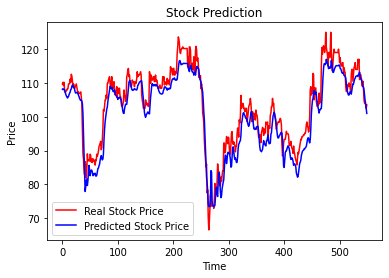

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.26356556]
 [0.26356556]
 [0.21991649]
 [0.21991649]
 [0.21991649]]
第Y個預測日之正規化股價
0.20536679307733152
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_20 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_22 (Dropout)    

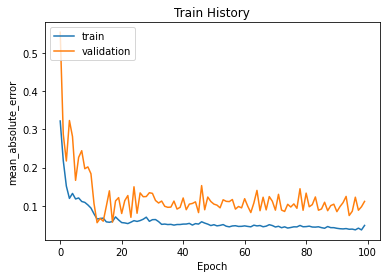

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.76615497]
 [0.74382631]
 [0.76243347]
 [0.75871197]
 [0.77731897]]
第Y個預測日之正規化股價
0.7475478053616147
18/18 [==============================] - 0s 10ms/step - loss: 0.0691 - mean_absolute_error: 0.0691


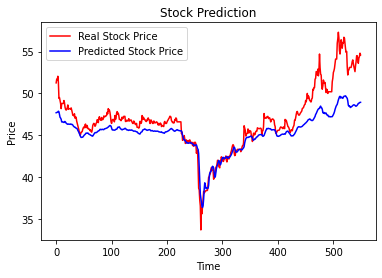

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.87451858]
 [0.87451858]
 [0.68794715]
 [0.66758396]
 [0.54100168]]
第Y個預測日之正規化股價
0.5663181389980395
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_25 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_26 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_27 (Dropout)     

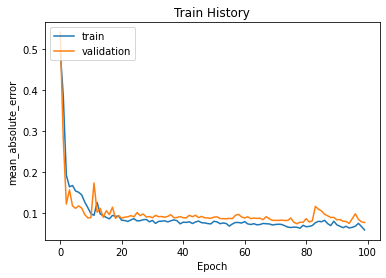

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.42635754]
 [0.41432949]
 [0.38492778]
 [0.41299311]
 [0.38626416]]
第Y個預測日之正規化股價
0.37129595939892657
18/18 [==============================] - 0s 10ms/step - loss: 0.0467 - mean_absolute_error: 0.0467


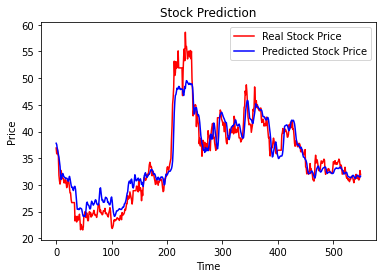

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.29787233]
 [0.29787233]
 [0.39184394]
 [0.49521272]
 [0.6088653 ]]
第Y個預測日之正規化股價
0.5381206531761766
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_30 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_31 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_32 (Dropout)     

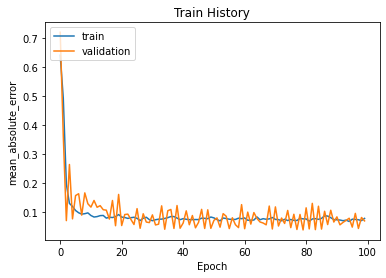

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.06443594]
 [0.0624807 ]
 [0.05836901]
 [0.05822527]
 [0.05667258]]
第Y個預測日之正規化股價
0.0636308694597956
18/18 [==============================] - 0s 10ms/step - loss: 0.2452 - mean_absolute_error: 0.2452


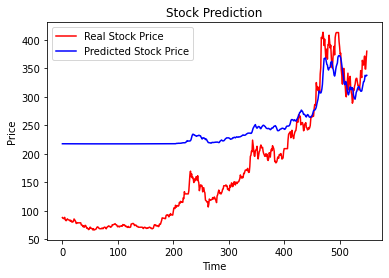

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.89799338]
 [0.89799338]
 [0.84366911]
 [0.93009404]
 [0.91280902]]
第Y個預測日之正規化股價
0.9473788910712833
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_35 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_36 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_37 (Dropout)     

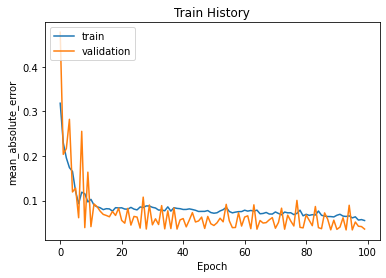

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.14075018]
 [0.13847997]
 [0.12485899]
 [0.12826424]
 [0.12690213]]
第Y個預測日之正規化股價
0.10329249889510483
18/18 [==============================] - 0s 10ms/step - loss: 0.0301 - mean_absolute_error: 0.0301


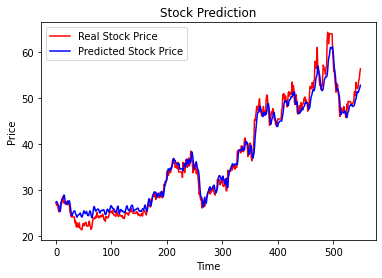

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.89578574]
 [0.90197721]
 [0.8895951 ]
 [0.88237228]
 [0.80085806]]
第Y個預測日之正規化股價
0.7998260854680725
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_40 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_41 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_41 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_42 (Dropout)     

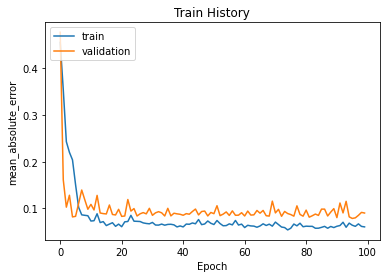

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.58697519]
 [0.57247147]
 [0.5521661 ]
 [0.56501219]
 [0.50409624]]
第Y個預測日之正規化股價
0.5127985497826132
18/18 [==============================] - 0s 11ms/step - loss: 0.0455 - mean_absolute_error: 0.0455


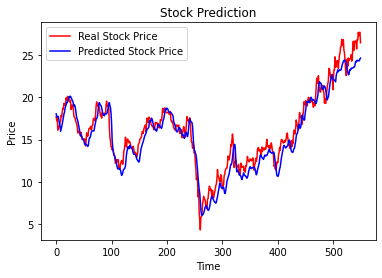

輸入變數維度 (189, 5, 1)
預測變數維度 (189,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.98886018]
 [0.96298734]
 [0.90728822]
 [0.90405444]
 [0.86308803]]
第Y個預測日之正規化股價
0.8497920666499716
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_45 (LSTM)               (None, 5, 256)            264192    
_________________________________________________________________
dropout_45 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_46 (Dropout)         (None, 5, 256)            0         
_________________________________________________________________
lstm_47 (LSTM)               (None, 5, 256)            525312    
_________________________________________________________________
dropout_47 (Dropout)     

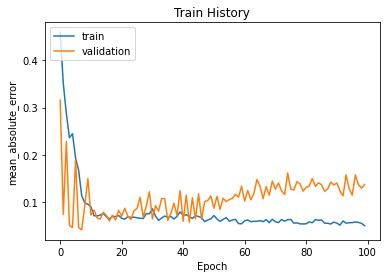

輸入變數維度 (550, 5, 1)
預測變數維度 (550,)
第Y個被預測日之前ref_day天每天正規化股價
[[0.32563184]
 [0.32708284]
 [0.31781851]
 [0.33154739]
 [0.30721507]]
第Y個預測日之正規化股價
0.30040631232626624
18/18 [==============================] - 0s 11ms/step - loss: 0.1244 - mean_absolute_error: 0.1244


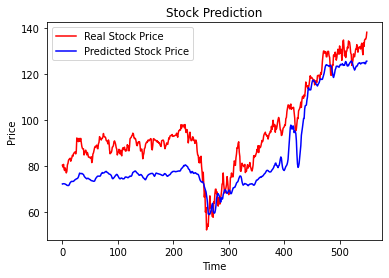

In [7]:
stock.shape
for i in range(stock.shape[1]-1):
  n= i+1
  stock_set = stock[stock.columns[n]] 

  #分割訓練資料與測試資料
  length = len(stock[stock.Date<'2019/3/19'])-ref_day #決定分割時間點，例如以2019-03-20之前ref_day天以前之有交易記錄的資料為training set
  train = stock_set[0:length] #決定資料分割時間點，例如以2021-01-31前ref_day天起為testing set
  test = stock_set[length:]

  #使用sklearn的preprocessing的MinMaxScaler進行正規化:(x-min)/(max-min)
  #執行正規化
  train = train.values.reshape(-1,1) #執行reshape，使其shape為(資料長度,1)
  scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(train)
  train_nom = scaler.transform(train) #執行正規化，使得特徵值範圍介於0~1

  X_train, Y_train = xy_set(train_nom, ref_day) #區分訓練資料之input variables與output variable
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 轉成三維，以便符合keras recurrent之input_shape
  Y_train = np.squeeze(Y_train)
  print('輸入變數維度',X_train.shape)
  print('預測變數維度',Y_train.shape)
  print('第Y個被預測日之前ref_day天每天正規化股價')
  print(X_train[4])
  print('第Y個預測日之正規化股價')
  print(Y_train[4])

  model = Sequential()
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))
  model.add(LSTM(units=256, activation="relu", return_sequences=False, input_shape=(X_train.shape[1], dim)))
  model.add(Dropout(d))  
  model.add(Dense(units=1))
      #model.compile(optimizer='adam', loss='mse')  # rmsprop
      #model.compile(loss="mean_squared_error", optimizer="adam",metrics=['mean_squared_error']) 
      # 屬迴歸分析，通常使用Mean Squared Error或Mean Absolute Error
  model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
  model.summary()
  train_history =model.fit(X_train, Y_train,batch_size=32,  
                         epochs=100,verbose=1,validation_split=0.2)
  
  show_train_history(train_history,'mean_absolute_error','val_mean_absolute_error')

  #分割訓練資料與測試資料
  length = len(stock[stock.Date<'2019/3/19'])-ref_day #決定分割時間點，例如以2021-01-31之前的ref_day天以後之有交易記錄的資料為testing set
  test = stock_set[length:]
  #執行正規化
  test = test.values.reshape(-1,1) #執行reshape，使其shape為(資料長度,1)
  test_scaler= preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(test)
  test_nom = test_scaler.transform(test) #執行正規化，使得特徵值範圍介於0~1

  X_test, Y_test = xy_set(test_nom, ref_day) #區分訓練資料之input variables與output variable
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # 轉成三維，以便符合keras recurrent之input_shape
  Y_test = np.squeeze(Y_test)
  print('輸入變數維度',X_test.shape)
  print('預測變數維度',Y_test.shape)
  print('第Y個被預測日之前ref_day天每天正規化股價')
  print(X_test[4])
  print('第Y個預測日之正規化股價')
  print(Y_test[4])

  scores = model.evaluate(X_test, Y_test, verbose=1) #使用model.evaluate進行模型評估，評估後的績效指標會儲存於scores
  scores[1] #傳回測試資料的mean_absolute_error

  Y_test_predict=model.predict(X_test) #測試資料預測結果
  Y_test_predict_price = test_scaler.inverse_transform(Y_test_predict) # 將正規化預測值轉換為股票價格

  X_test_real, Y_test_real = xy_set(test, ref_day) #取得測試資料之被預測日之真實股票價格
  show_test_result(Y_test_real,Y_test_predict_price) #結果若不錯，代表可以使用此模型預測某支股票的股價

  col= stock.columns[n] 
  result= pd.DataFrame(Y_test_predict_price, columns= [col])
  rdf= pd.concat([rdf, result], axis=1)


In [ ]:
rdf

,TSLA,4958.TW,2330.TW,1536.TW,3501.TW,603305.SS,300750.SZ,600885.SS,DAN,TEL
0,286.317902,73.132690,236.034012,115.566010,39.543957,30.805227,219.347473,24.314190,16.465437,99.205132
1,286.321320,73.130211,236.019501,116.459488,39.486706,30.806133,219.343872,24.288130,16.332222,99.039604
2,286.330933,73.120735,235.992294,116.734108,39.382786,30.807568,219.380768,24.380196,16.397314,99.190781
3,286.335541,73.117180,236.000748,116.399178,39.325253,30.807489,219.243744,24.576969,16.296656,99.191254
4,286.336487,73.130020,236.012772,117.925545,39.269661,30.808176,219.213608,24.805611,16.042294,99.358391
...,...,...,...,...,...,...,...,...,...,...
644,641.249878,119.553459,601.029175,109.814438,53.321011,30.869081,316.435699,49.737938,21.405432,117.814484
645,637.428345,117.624168,597.572266,109.110748,53.505310,30.892986,322.479492,50.805599,21.335461,117.307060
646,641.813477,116.161293,597.094788,108.623268,53.604881,30.869892,321.579224,50.460331,21.366543,117.509941
647,644.685608,115.323677,597.184875,106.923401,53.532234,30.864250,321.768799,50.551254,21.706816,118.483505


In [8]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果')
print(os.getcwd() )#获取当前工作路径
timenow= time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 
type(timenow) #str

outstr= 'result'+ timenow + '.csv'
rdf.to_csv(outstr) #相对位置，保存在getwcd()获得的路径下

outstr

/content/gdrive/MyDrive/Colab Notebooks/LSTM預測結果


'result2021-05-13 14:55:27.csv'